<a href="https://colab.research.google.com/github/rishubhkhurana/EVA/blob/master/S13/S13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 31.06 MiB/s, done.
Resolving deltas: 100% (7/7), done.


### Importing Libs

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import time
import glob
import torch
import os
from pathlib import Path
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


## Data exploration and cleaning

In [5]:
ls 

gdrive/  sample_data/  YoloV3/


In [6]:
cd YoloV3/

/content/YoloV3


In [0]:
!rm data/customdata/images/*

In [0]:
!cp  -R  /content/gdrive/My\ Drive/yolov3/Images/r2d2/* data/customdata/images/.

In [0]:
!cp  -R  /content/gdrive/My\ Drive/yolov3/Labels/r2d2/* data/customdata/labels/.

In [0]:
#  verifying if we have labels for every file or not 
datapath = Path('data/customdata/')

In [0]:
all_imgs = [f.stem for f in (datapath/'images').iterdir()]
all_labels = [f.stem for f in (datapath/'labels').iterdir()]

In [37]:
assert len(all_imgs)==len(all_labels)

True

In [0]:
img_to_label_diff=set(all_labels).difference(set(all_imgs))

In [40]:
assert len(set(all_imgs).difference(set(all_labels)))==0

set()

#### Creating required files

In [104]:
!sed -i "s/walle/r2d2/g" /data/customdata/customdata.names

sed: can't read /data/customdata/customdata.names: No such file or directory


In [110]:
!ls data/customdata

custom.names  images  labels  test.txt	train.txt


In [0]:
with open(datapath/'custom.names','w') as f:
  f.write('r2d2')

In [0]:
with open(datapath/'custom.data','w') as f:
  content ='classes=1\ntrain=data/customdata/custom.txt\nvalid=data/customdata/custom.txt\nnames=data/customdata/custom.names'
  f.write(content)

In [0]:
with open(datapath/'custom.txt','w') as f:
  for file in all_imgs[:-1]:
    f.write('./data/customdata/images/'+file+'.jpg\n')
  f.write('./data/customdata/images/'+all_imgs[-1]+'.jpg')


In [0]:
!mkdir weights

In [0]:
!cp /content/gdrive/My\ Drive/yolov3/yolov3-spp-ultralytics.pt weights/.

### Training the Model

In [60]:
!python train.py --data data/customdata/custom.data  --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave


               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 47/47 [00:22<00:00,  2.08it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 47/47 [00:22<00:00,  2.08it/s]
                 all       464       483         1   0.00207    0.0458   0.00413

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
  0% 0/47 [00:00<?, ?it/s]                 all       464       483         1   0.00207    0.0458   0.00413

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     1/299     6.91G       5.6      2.04         0      7.64         6       512: 100% 47/47 [00:58<00:00,  1.25s/it]
     1/299     6.91G       5.6      2.04         0      7.64         6       512: 100% 47/47 [00:58<00:00,  1.25s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 47/47 [00:21<00:00,  2.15it/s]
               Class    Images   Targets         P        

### Infering on the Images

In [61]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/464 data/customdata/images/-4648077890300981851.jpg: 512x384 1 r2d2s, Done. (0.034s)
image 2/464 data/customdata/images/-8715925142941250849.jpg: 512x384 1 r2d2s, Done. (0.033s)
image 3/464 data/customdata/images/-90779724-baker-r2d2-getty.jpg: 320x512 1 r2d2s, Done. (0.029s)
image 4/464 data/customdata/images/-98454278-0000.jpg: 320x512 1 r2d2s, Done. (0.028s)
image 5/464 data/customdata/images/00-jpg488483BF-6E34-4CAF-A20D-7797502BD339Zoom.jpg: 512x512 1 r2d2s, Done. (0.037s)
image 6/464 data/customdata/images/04

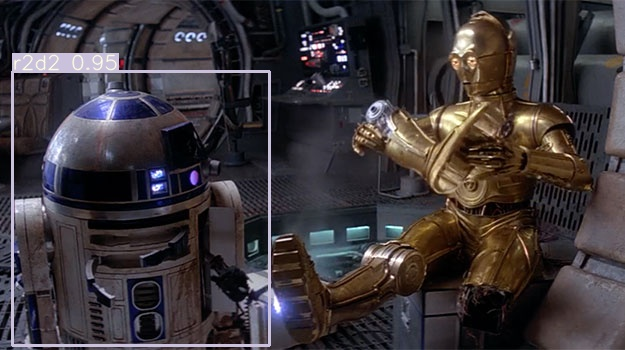

In [68]:
Image(filename='out_out/shocking.jpg', width=600)

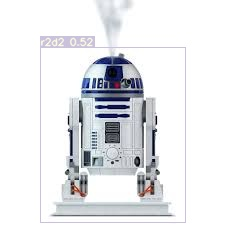

In [69]:
Image(filename='out_out/imag1.jpg', width=600)

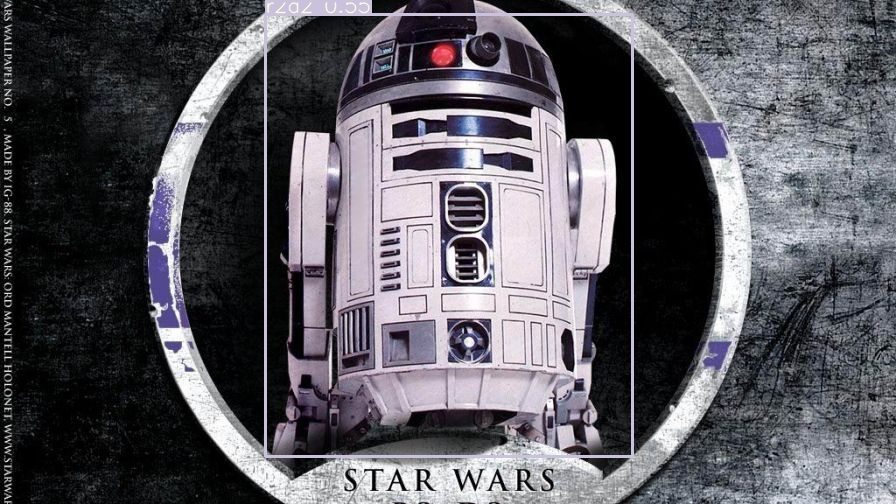

In [71]:
Image(filename='out_out/lg.jpg', width=600)

### Video Loading, trimming and Inference

In [90]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('r2d2_trim.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [116]:
!ffmpeg -ss 00:00:00 -i r2d2 -t 00:00:15 -c copy r2d2_trim.mp4


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [117]:
!python detect.py --conf-thres 0.1 --output out_vid --source r2d2_trim.mp4

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_vid', save_txt=False, source='r2d2_trim.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/795) r2d2_trim.mp4: 320x512 1 r2d2s, Done. (0.030s)
video 1/1 (2/795) r2d2_trim.mp4: 320x512 1 r2d2s, Done. (0.029s)
video 1/1 (3/795) r2d2_trim.mp4: 320x512 1 r2d2s, Done. (0.029s)
video 1/1 (4/795) r2d2_trim.mp4: 320x512 1 r2d2s, Done. (0.028s)
video 1/1 (5/795) r2d2_trim.mp4: 320x512 Done. (0.028s)
video 1/1 (6/795) r2d2_trim.mp4: 320x512 1 r2d2s, Done. (0.027s)
video 1/1 (7/795) r2d2_trim.mp4: 320x512 Done. (0.027s)
video 1/1 (8/795) r2d2_trim.mp4: 320x512 Done. (0.027s)
video 1/1 (9/795) r2d2_trim.mp4: 320x512 Don

In [123]:
!!cp r2d2_trim_v1.mp4 /content/gdrive/My\ Drive/r2d2_trim_v1.mp4

[]